## Observations and Insights 

Observed while examining the tumor stats summary data frame, the drug regimens Capomulin and Ramicane have lower mean tumor volumes and the lowest tumor volume standard deviations. Based on this, these may be the most promising of the drug regimens. I would want to examine this further by plotting the tumor volume over time for the mice on both of these drug regimens to see if there are apparent declines in tumor volume over time. 

The number of measurements per drug regimen bar charts indicate that mice being treated with Capomulin or Ramicane are being measured more times than the other mice, and this seems to indicate that overall mice being treated with these drug regimens are living longer into the study than mice being treated with other drug regimens.     

The scatter plot of Average Tumor Volumes vs. Mouse Weight shows there is a positive correlation between the tumors and mouse weight and in this situation it seems that we could conclude that the weight of a mouse influences the size of a mouse’s tumor. 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts

In [3]:
# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Check for similar columns between the two csv files
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [5]:
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [6]:
# Combine the data into a single dataset
pyma_merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
pyma_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice
mice = pyma_merged_df['Mouse ID'].value_counts()
print(f'There are {len(mice)} mice in all.')

There are 249 mice in all.


In [8]:
# Sort by Mouse ID to begin analyzing for duplicates
sorted_pyma_merged_df = pyma_merged_df.sort_values(by=['Mouse ID', 'Timepoint'])
sorted_pyma_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
dupl_timepoints_for_mouse = pyma_merged_df.duplicated(subset=['Mouse ID', 'Timepoint']).any()

print(f'It is "{dupl_timepoints_for_mouse}" that there is a Mouse ID with duplicated timepoints.')

# Locate the Mouse IDs where timepoints are duplicated.
dupl_mouse = pyma_merged_df.loc[pyma_merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']
dupl_mouse
print('Duplicate concerns include')
print(dupl_mouse)

It is "True" that there is a Mouse ID with duplicated timepoints.
Duplicate concerns include
909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [10]:
# View the area of the data where concerns are identified for duplicates (around index 909)
pyma_merged_df.iloc[905:925,:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
905,g867,Stelasyn,Female,9,25,5,46.880749,0
906,g867,Stelasyn,Female,9,25,10,48.183402,0
907,g867,Stelasyn,Female,9,25,15,51.060419,1
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1


In [11]:
# Retrieve all the data for the duplicate mouse ID (displayed in a data frame) 

# Use loc to pull the results for mouse id g989                              
locations = pyma_merged_df.loc[pyma_merged_df['Mouse ID'] == 'g989']
locations

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Retrieve all the data for the duplicate mouse ID (displayed in a data frame) 
# Use loc to pull the data for mouse id g989
dupl_mouse_data_df = pyma_merged_df.loc[pyma_merged_df['Mouse ID'] == 'g989', [
    'Drug Regimen',
    'Sex',
    'Age_months', 
    'Weight (g)',
    'Timepoint',
    'Tumor Volume (mm3)',
    'Metastatic Sites'
]]

dupl_mouse_data_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,Propriva,Female,21,26,0,45.000000,0
909,Propriva,Female,21,26,0,45.000000,0
910,Propriva,Female,21,26,5,48.786801,0
911,Propriva,Female,21,26,5,47.570392,0
912,Propriva,Female,21,26,10,51.745156,0
913,Propriva,Female,21,26,10,49.880528,0
914,Propriva,Female,21,26,15,51.325852,1
915,Propriva,Female,21,26,15,53.442020,0
916,Propriva,Female,21,26,20,55.326122,1
917,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
pyma_df = pyma_merged_df.drop(pyma_merged_df[pyma_merged_df['Mouse ID'] == 'g989'].index)

pyma_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(pyma_df['Mouse ID'].value_counts())
print(f'After duplicate concerns were removed, there are {total_mice} mice for analysis.')

After duplicate concerns were removed, there are 248 mice for analysis.


In [15]:
# pyma_cleaned_df = pyma_df.set_index('Mouse ID')
# pyma_cleaned_df

# once index is set Mouse ID became an object that couldn't be used for 
# identifying the duplicate - # would the data be able to be grouped by if it's the index?

# Keeping code in case there's a reason I will want to reset index*************************

In [16]:
pyma_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Start with a Groupby using the Drug Regimen column
pyma_regimens = pyma_df.groupby(['Drug Regimen'])

# View that the data grouped by Drug Regimen
pyma_regimens.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [18]:
pyma_df.describe()
# Want to remove this

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [19]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume
pyma_regimens = pyma_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

tumor_mean = pyma_regimens.mean()
tumor_median = pyma_regimens.median()
tumor_variance = pyma_regimens.var()
tumor_stdev = pyma_regimens.std()
tumor_sem = pyma_regimens.sem()

In [20]:
# Is there something I should do differently to display Tumor vol as a header for the chart
# similar to the agg dataframe -
# pyma_regimens_method2.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

In [21]:
# Assemble the resulting series into a single summary dataframe
tumor_stats_summary_df = pd.DataFrame({
    'Tumor Volume Mean':tumor_mean,
    'Tumor Volume Median':tumor_median,
    'Tumor Volume Variance':tumor_variance,
    'Tumor Volume Standard Deviation':tumor_stdev,
    'Tumor Volume Standard Error of Mean':tumor_sem   
})

# View the tumor volume statistical summary data frame
tumor_stats_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pyma_regimens_method2 = pyma_df.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
pyma_regimens_method2.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pyma_regimens = pyma_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Using the aggregation method, produce the same summary statistics in a single line
pyma_regimens.agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas

# Begin by creating a variable for the count and add a column to the existing Tumor Stats Summary data frame
tumor_samples_count = pyma_regimens.count() 
tumor_stats_summary_df['Tumor Samples Count'] = tumor_samples_count

# View the data frame
tumor_stats_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Mean,Tumor Samples Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [25]:
# Grabe from the data frame the drug regimens with tumor samples count, each that would have been measured
count_by_regimen = tumor_stats_summary_df['Tumor Samples Count']
count_by_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Samples Count, dtype: int64

<IPython.core.display.Javascript object>


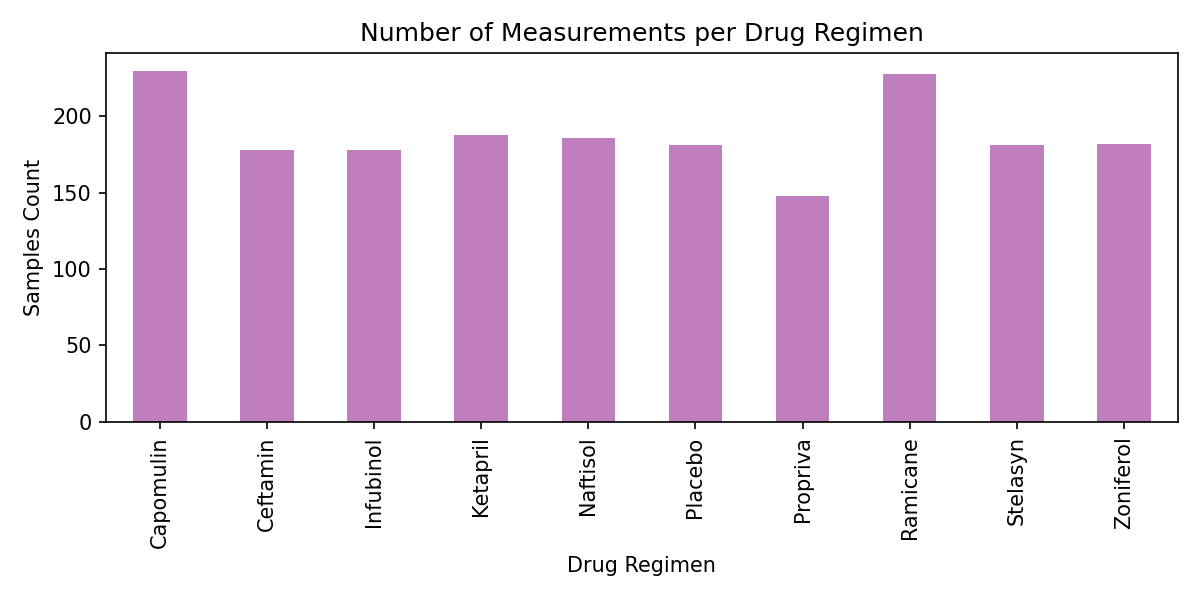

In [26]:
# Plot the total number of measurements taken on each drug regimen using pandas (Figure 1)
count_by_regimen_chart = count_by_regimen.plot(kind='bar', facecolor='purple', alpha=0.50, figsize=(8, 4))

# count_by_regimen_chart = count_by_regimen.plot(kind='bar', facecolor='purple', alpha=0.50, figsize=(8, 4), rot=45)
# how can I use the rot=45 and shift the x labels left to line up with the bar ticks?**********

# Add title and x and y labels
plt.title('Number of Measurements per Drug Regimen')
count_by_regimen_chart.set_xlabel('Drug Regimen')
count_by_regimen_chart.set_ylabel('Samples Count')

# Modify layout so bar chart tightly fills the area of the figure, and view the bar chart
plt.tight_layout()
plt.show()

In [27]:
#if needed, format a reset of index
# measurements_taken_df = measurements_taken_df.set_index("Drug Regimen")

<IPython.core.display.Javascript object>


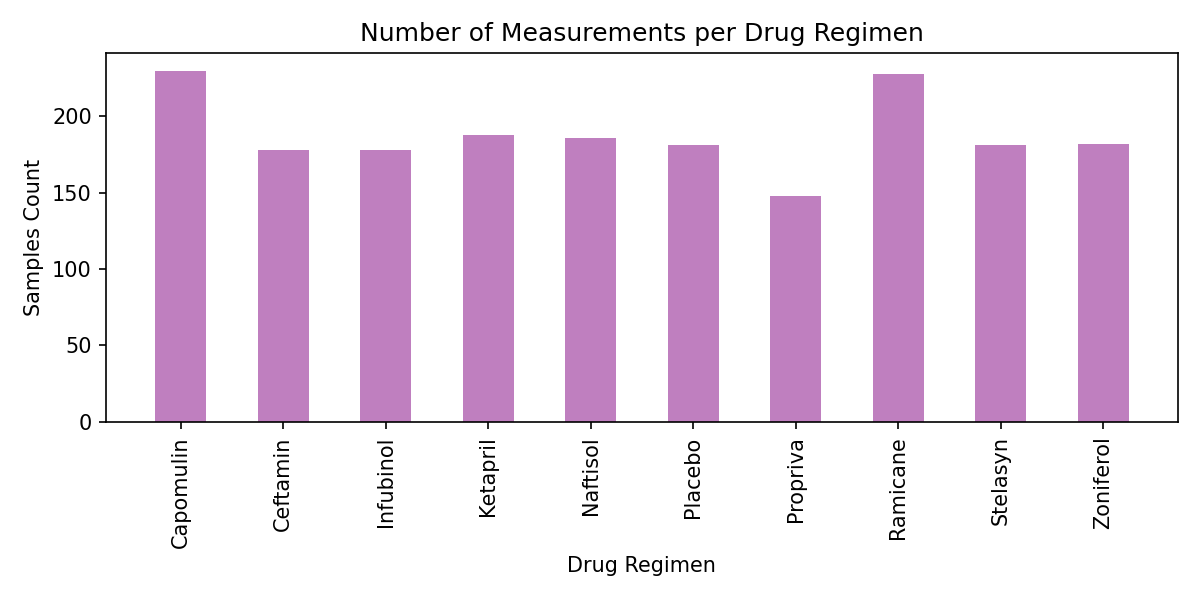

In [28]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot (Figure 2)
# Grab the unique values for Drug Regimen and sort alphabetically
regimens = pyma_df['Drug Regimen'].unique()
regimens.sort()
regimens

# Create a variable to hold the y values
count_by_regimen_group = pyma_df.groupby('Drug Regimen')['Tumor Volume (mm3)'] 
y_values = count_by_regimen_group.count()
y_values

# Set up the x_axis based on the number of regimens
x_axis = np.arange(0, len(regimens))

# Identify tick locations for each value of the x_axis
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

# Create a figure for the pyplot plot
plt.figure(figsize=(8 ,4))

# Add a title and x and y labels    
plt.title('Number of Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Samples Count')

# Add the bar chart to the figure created, with same color and look as the Pandas plot
plt.bar(x_axis, y_values, color='purple', alpha=0.5, align='center', width=0.5)

# Label the x axis with the names of the drug regimens
plt.xticks(tick_locations, regimens, rotation='vertical')

# Modify layout so bar chart tightly fills the area of the figure, and view the bar chart
plt.tight_layout()
plt.show()

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# First create a data frame
pyma_gender_df = pyma_df['Sex'].value_counts().to_frame()
pyma_gender_df

,Sex
Male,958
Female,922


<IPython.core.display.Javascript object>


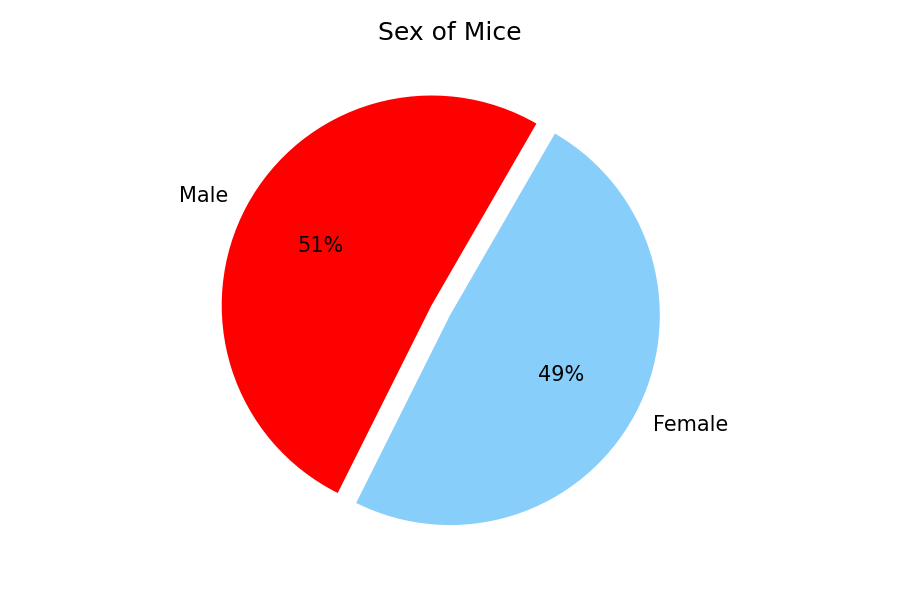

In [30]:
# Plot the sex of the mice using pandas (Figure 3)

# Identify the colors for each pie wedge
colors = ["red", "lightskyblue"]

# Create space between the two wedges
explode = (0.1, 0)

# Create the pie chart using pandas dataframe.plot, adding in title and specifics
gender_pie_chart = pyma_gender_df.plot(kind='pie', y="Sex", title="Sex of Mice", figsize=(6 ,4), colors=colors,
        autopct="%1.0f%%", legend=None, explode=explode, startangle=60)

# Remove the y-label that does not add value to the chart
plt.ylabel('')

# Tighten up space around the chart and display the chart
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


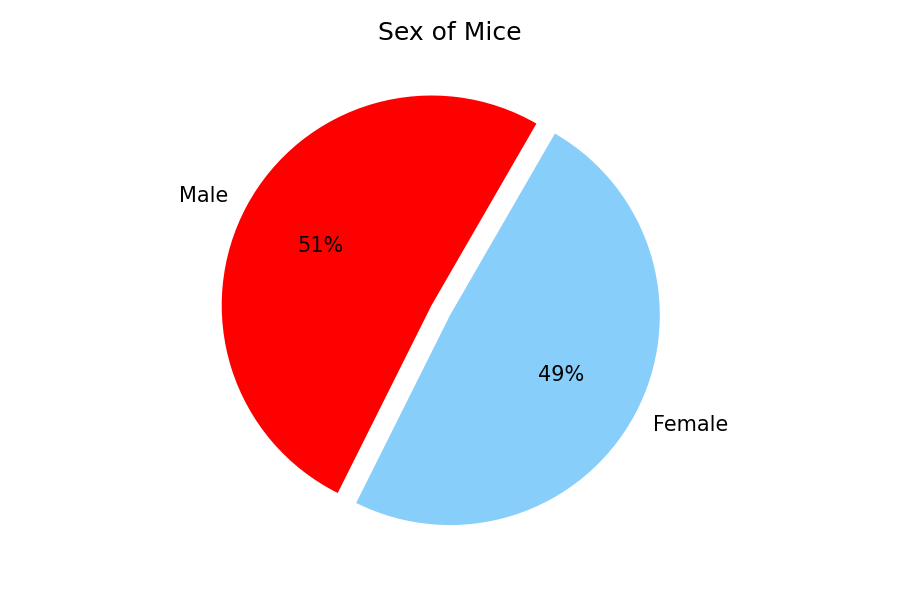

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot (Figure 4)

# Identify the labels for the pie wedges and the size and color of each wedge
labels = ["Male", "Female"]
sizes = [958, 922]
colors = ["red", "lightskyblue"]

# Create space between the two wedges
explode = (0.1, 0)

# Need to plt.figure so that it does not overlay another chart
plt.figure(figsize=(6, 4))

# Create the pie chart using pyplot
fig3 = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.0f%%", startangle=60)
plt.title("Sex of Mice")

# Tighten up space around the chart and display the chart
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# First narrow the scope of the pyma_df to only the columns desired for identifying the last timepoint per mouse ID
timepoint_pyma_df = pyma_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

# View to verify all rows included before filtering out for the drug regimens
timepoint_pyma_df

# Create a variable holding the list of the drug regimens of interest
regimens_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data frame to include only the mice treated with these four drug regimens
filtered_pyma_df = timepoint_pyma_df[timepoint_pyma_df['Drug Regimen'].isin(regimens_of_interest)]

# View the results to ensure the correct number of rows exist
# Had done individual data frames for each of the four drug regimens and total rows should be 814
filtered_pyma_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1868,z581,Infubinol,25,54.316407
1869,z581,Infubinol,30,56.286750
1870,z581,Infubinol,35,58.628399
1871,z581,Infubinol,40,60.053740


In [33]:
#(use a .max for Timepoint or a for loop using when mouse id not equal to next row's mouse id)
 
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merge will be last timepoint - all values, plus the other df where those values exist
# pyma_df

In [34]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Start by finding data for only mice treated with Capomulin
filtered_Capomulin_df = pyma_df.loc[pyma_df['Drug Regimen'] == 'Capomulin']
filtered_Capomulin_df

# Select a specific mouse from those mice, mouse id i557
mouse_id_i557_df = filtered_Capomulin_df.loc[pyma_merged_df['Mouse ID'] == 'i557']
mouse_id_i557_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0
436,i557,Capomulin,Female,1,24,25,44.596219,0
437,i557,Capomulin,Female,1,24,30,45.261384,0
438,i557,Capomulin,Female,1,24,35,45.941949,0
439,i557,Capomulin,Female,1,24,40,46.821070,1
440,i557,Capomulin,Female,1,24,45,47.685963,1


<IPython.core.display.Javascript object>


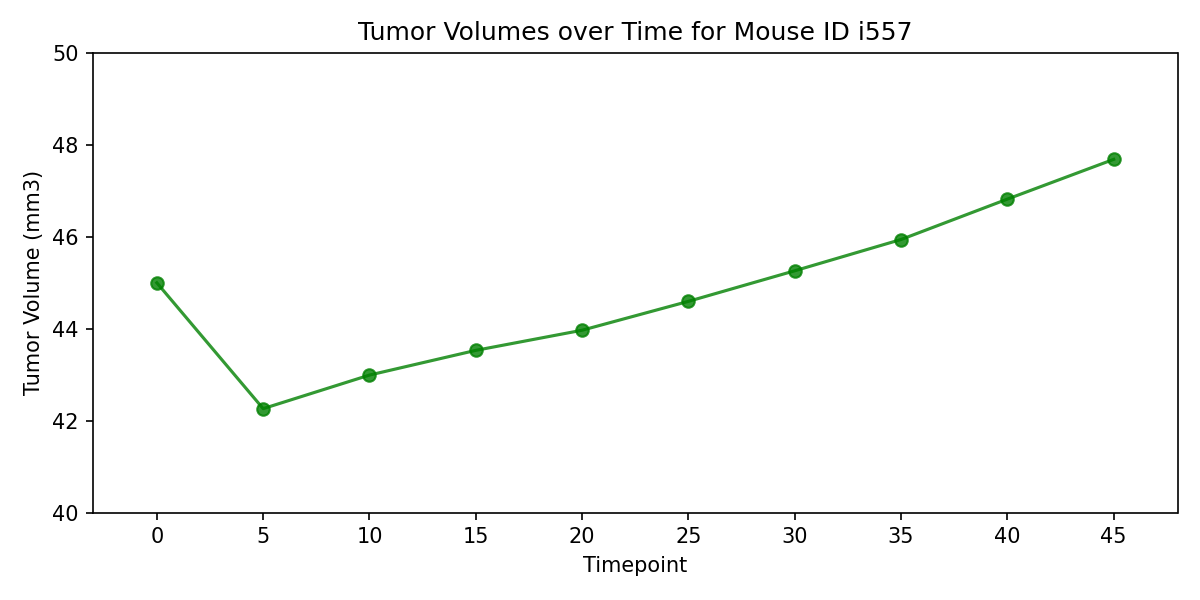

In [37]:
# Set x axis for the line plot, using Timepoints (greatest timepoints are 45)
x_axis_data = np.arange(0, 50, 5)
x_axis_data

tick_locations = [value for value in x_axis]
tick_locations

y_values = mouse_id_i557_df['Tumor Volume (mm3)']
y_values
# Create and name the chart
mouse_i557_chart = plt.figure(figsize=(8,4))

plt.plot(x_axis_data, y_values, marker ='o', color = 'g', alpha=0.8)
plt.xticks(mouse_id_i557_df['Timepoint'])
plt.title('Tumor Volumes over Time for Mouse ID i557')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


plt.xlim(-3, 48) 
plt.ylim(40, 50)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


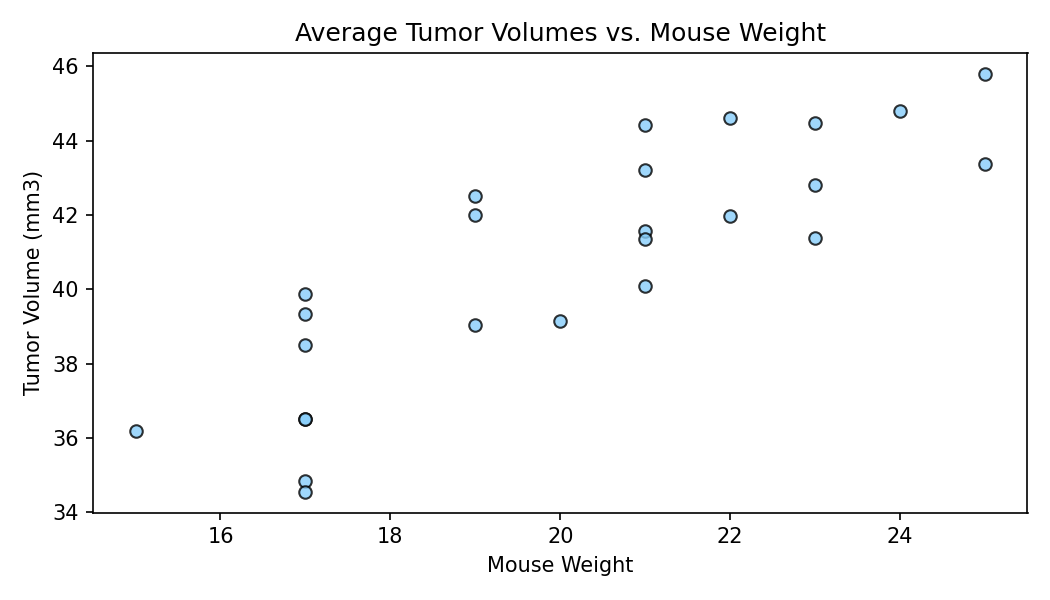

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Use the data frame filtered_Capomulin_df and groupby to get the mean weight and tumor volume for each mouse
for_mouse_mean_tumorvol = filtered_Capomulin_df.groupby(['Mouse ID']).mean()

x_axis = (0, 50, 5)

tumor_vs_weight_scatter = plt.figure(figsize=(7, 4))

plt.scatter(for_mouse_mean_tumorvol['Weight (g)'], for_mouse_mean_tumorvol['Tumor Volume (mm3)'], marker = 'o', facecolors='lightskyblue',\
                                      edgecolors="black", alpha=0.80)


x_limit = for_mouse_mean_tumorvol['Weight (g)'].max() * 1.1
plt.title('Average Tumor Volumes vs. Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')

plt.tight_layout()
plt.show()

## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
